In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# look at the number of journals, articles/ journal etc.
# filter out journals that are physics / chemistry related 
cons_articles = pd.read_json('/workspaces/conservation-trends/conservation_full.json')

print(cons_articles.columns)

counts = cons_articles['container-title'].value_counts()

print(counts)

popular_journals = counts[counts > 100].index

filtered_articles = cons_articles[cons_articles['container-title'].isin(popular_journals)]

print(len(popular_journals), "journals with more than 100 articles")
print(len(filtered_articles), "filtered articles")

for index in popular_journals:
    print(index)

Index(['title', 'author', 'container-title', 'DOI', 'abstract',
       'published-online', 'year', 'month', 'day'],
      dtype='object')
container-title
[Ecology and Evolution]                     11243
[Molecular Ecology]                          4996
[Frontiers in Ecology and Evolution]         3511
[Ecology]                                    3307
[Journal of Applied Ecology]                 2573
                                            ...  
[Hygiene of populated places]                   1
[Microbial Cell Factories]                      1
[Pharmaceutics]                                 1
[Helicobacter]                                  1
[Iranian Journal of Veterinary Medicine]        1
Name: count, Length: 3694, dtype: int64
85 journals with more than 100 articles
68065 filtered articles
['Ecology and Evolution']
['Molecular Ecology']
['Frontiers in Ecology and Evolution']
['Ecology']
['Journal of Applied Ecology']
['Functional Ecology']
['Journal of Ecology']
['Methods in Eco

Text(0, 0.5, 'Frequency')

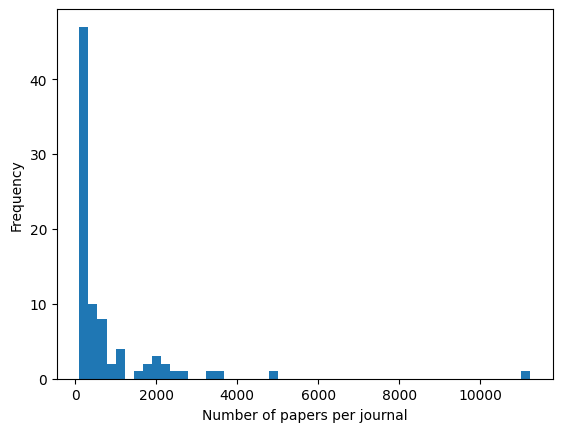

In [2]:
popular = counts[counts > 100]
plt.hist(popular, bins = 50)
plt.xlabel('Number of papers per journal')
plt.ylabel('Frequency')

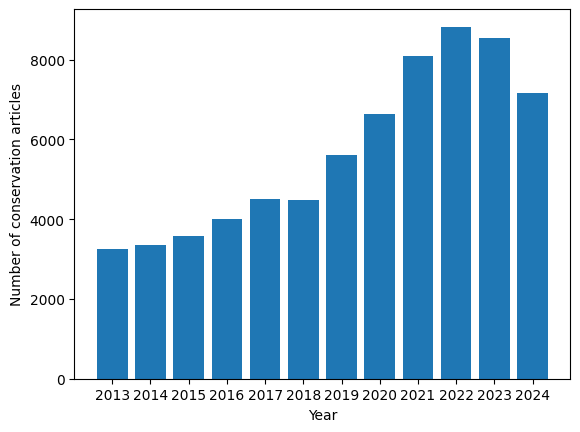

In [3]:
year_counts = filtered_articles["year"].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values, align='center', width=0.8) 
plt.xlabel("Year")
plt.ylabel("Number of conservation articles")
plt.xticks(year_counts.index)
plt.show()

In [4]:
np.percentile(counts.values, 97.5)


np.float64(93.0)

In [5]:
filtered_articles['abstract']

0        <jats:p>In nature, the interaction between pat...
1        <jats:p>The spillover of viruses from wildlife...
2        <jats:p>Mental epidemics is a new phenomenon o...
3        <jats:p>In the article, there have been separa...
4        <jats:p>In the article, the features of develo...
                               ...                        
81952    <jats:title>Abstract</jats:title><jats:p>Amazo...
81953    <jats:title>Abstract</jats:title><jats:p>Xenar...
81954    <jats:title>Abstract</jats:title><jats:sec><ja...
81955    <jats:title>Abstract</jats:title><jats:p>Mamma...
81956    <jats:title>Abstract</jats:title><jats:p>Biolo...
Name: abstract, Length: 68065, dtype: object

In [7]:
def remove_tags(text):
    cleaned_text = re.sub(r">Abstract<", "><", text, flags=re.IGNORECASE).strip()
    cleaned_text = re.sub(r"<[^>]*>", "", cleaned_text)
    return cleaned_text

filtered_articles['abstract'] = filtered_articles['abstract'].apply(remove_tags)
filtered_articles['abstract']

/tmp/ipykernel_21858/252795300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_articles['abstract'] = filtered_articles['abstract'].apply(remove_tags)


0        In nature, the interaction between pathogens a...
1        The spillover of viruses from wildlife into ag...
2        Mental epidemics is a new phenomenon of integr...
3        In the article, there have been separated fact...
4        In the article, the features of development of...
                               ...                        
81952    Amazonia’s floodplain system is the largest an...
81953    Xenarthrans—anteaters, sloths, and armadillos—...
81954    MotivationThe BioTIME database contains raw da...
81955    Mammalian carnivores are considered a key grou...
81956    Biological invasion is one of the main threats...
Name: abstract, Length: 68065, dtype: object

In [8]:
filtered_articles.to_json('/workspaces/conservation-trends/conservation_filtered.json', orient='records', indent=4)